# Paragon Corps Sales Prediction

Tujuan dari proyek ini adalah untuk melakukan prediksi terhadap rata-rata penjualan produk dalam 12 minggu kedepan dengan membandingkan dua algoritma forecasting, yaitu Exponential Smoothing Holt's winter, dan Autoregressive Integrated Moving Average (ARIMA) dengan auto-ARIMA.

Setelah dilakukan analisis, model yang paling akurat adalah yaitu Autoregressive Integrated Moving Average (ARIMA)dan digunakan pada Proses Forecasting

# Perkenalan

**Nama: Muhamad Fikri Mumtaz**

**Batch: HCK-004**

**Dataset:sample_dataset_timeseries_noarea.csv**

**Objective : Memprediksi penjualan setiap produk untuk 12 minggu mendatang**

----

# Import Library

Berikut ini merupakan module yang digunakan

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, mean_absolute_percentage_error
from math import sqrt
from sklearn.linear_model import LinearRegression
from statsmodels.tsa.ar_model import AutoReg
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.api import ExponentialSmoothing, Holt
import pmdarima as pm
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import joblib

# Data Loading

Selanjutnya dilakukan loading dataset. Kemudian beberapa eksplorasi sederhana seperti melihat jumlah baris dan kolom data, nama dan type data masing - masing kolom, serta basic info dari data yang telah diload.

Dari sumber dataset, penulis memperoleh informasi mengenai masing - masing column sebagai berikut:

- week_number : berisikan informasi tentang spesifik  mingguan untuk barang yang terjual

- week_start_date: berisikan informasi tentang awal mingguan untuk barang yang terjual

- weel_end_date: berisikan informasi tentang akhir untuk barang yang terjual

- product_item: berisikan informasi tentang barang yang terjual

- quantity: berisikan informasi tentang jumlah barang yang terjual pada minggu tertentu

dataset berasal dari csv excel

In [2]:
df = pd.read_csv('sample_dataset_timeseries_noarea.csv')

tampilan dataset pada 10 baris pertama

In [3]:
df.head(10)

,week_number,week_start_date,week_end_date,product_item,quantity
0,2021-52,2021-12-27,2022-01-02,0073377087c7ddace313ff829cd7b0b3,41
1,2021-52,2021-12-27,2022-01-02,012d2bb142b2d5e57330acbfd8e9ac52,430
2,2021-52,2021-12-27,2022-01-02,0192926e33d1153b63511a5b83eca843,4
3,2021-52,2021-12-27,2022-01-02,019502f6d13e383caa9b9673bf1302f8,148
4,2021-52,2021-12-27,2022-01-02,01e7ca6d4e21badc1d4225b6b2c7bd9e,119
5,2021-52,2021-12-27,2022-01-02,01fa9977e1c61ce5542c6f0c2a1b2895,2
6,2021-52,2021-12-27,2022-01-02,043e6d02d98b44c40645c8a22812fe88,44
7,2021-52,2021-12-27,2022-01-02,0512efdcc99fa4d57c42cd2cf6c73633,165
8,2021-52,2021-12-27,2022-01-02,05262da388ab82c51c48c9535bc8b121,41
9,2021-52,2021-12-27,2022-01-02,058cc2cecb91d10e901a597e67532619,383


tampilan dataset pada 10 baris terakhir

In [4]:
df.tail(10)

,week_number,week_start_date,week_end_date,product_item,quantity
102723,2023-14,2023-04-03,2023-04-09,fe88080dd6a4387f1035c908d3ec26a5,4131
102724,2023-14,2023-04-03,2023-04-09,fe92a95f45cfe213258cd8da682cd1a3,9
102725,2023-14,2023-04-03,2023-04-09,fed98e52dd33638523d6028c19c3a103,21872
102726,2023-14,2023-04-03,2023-04-09,fef44d74d0c1e1d0d9f1c584391eeb60,75
102727,2023-14,2023-04-03,2023-04-09,ff24eb021c575c9a1dc709c3f8d6631a,436
102728,2023-14,2023-04-03,2023-04-09,ff3890faa80ff425ae906e27bbc50bc6,907
102729,2023-14,2023-04-03,2023-04-09,ff4b0f3b9c78c91510a4e3920fbc5090,81
102730,2023-14,2023-04-03,2023-04-09,ff9d05a4d6f922b3ab1653f58165b8ce,16
102731,2023-14,2023-04-03,2023-04-09,ffbd6f1d884056a4f622d54ae79e5a14,42920
102732,2023-14,2023-04-03,2023-04-09,fff18f7c705e729746515e2053dee64b,53


terdapat missing value pada 2 baris yang beradap pada kolom product_item

In [5]:
df.isna().sum()

week_number        0
week_start_date    0
week_end_date      0
product_item       2
quantity           0
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102733 entries, 0 to 102732
Data columns (total 5 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   week_number      102733 non-null  object
 1   week_start_date  102733 non-null  object
 2   week_end_date    102733 non-null  object
 3   product_item     102731 non-null  object
 4   quantity         102733 non-null  int64 
dtypes: int64(1), object(4)
memory usage: 3.9+ MB


karena persentase missing value yang tidak signifikan maka dapat dilakukan drop missing value

In [7]:
#persentase missing values
missing_percentage = df.isna().mean() * 100

# Tampilkan hasilnya dengan hanya menampilkan kolom dengan nilai yang lebih besar dari 0
print(missing_percentage[missing_percentage > 0])

product_item    0.001947
dtype: float64


In [8]:
df.dropna(inplace=True)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 102731 entries, 0 to 102732
Data columns (total 5 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   week_number      102731 non-null  object
 1   week_start_date  102731 non-null  object
 2   week_end_date    102731 non-null  object
 3   product_item     102731 non-null  object
 4   quantity         102731 non-null  int64 
dtypes: int64(1), object(4)
memory usage: 4.7+ MB


tidak terdapat data terduplikasi

In [10]:
# cek duplikat
df.duplicated().sum()

0

kolom week_start_date dan week_end_date masih dalam bentuk tipe data object dan harus dirubah ke bentuk datetime karena model time series harus menggunakan tipe data datetime.

In [11]:
# Convert column from object to datetime
df['week_start_date'] = pd.to_datetime(df['week_start_date'])
df['week_end_date'] = pd.to_datetime(df['week_end_date'])

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 102731 entries, 0 to 102732
Data columns (total 5 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   week_number      102731 non-null  object        
 1   week_start_date  102731 non-null  datetime64[ns]
 2   week_end_date    102731 non-null  datetime64[ns]
 3   product_item     102731 non-null  object        
 4   quantity         102731 non-null  int64         
dtypes: datetime64[ns](2), int64(1), object(2)
memory usage: 4.7+ MB


membuat datarame baru dengan copy data df

In [13]:
df1 = df.copy()

karena time series prediction hanya menggunakan 2 kolom saja yaitu date sebagai index dan quantity sebagai valuenya maka harus dilakukan drop kolom yaitu kolom week_number, week_end_date, dan product_item. Sehingga hanya tersisa dua kolom saja yaitu kolom week_start_date dirubah menjadi Date dan Quantity.

In [14]:
df1.drop(['week_number','week_end_date','product_item'], axis = 1, inplace = True)
df1.columns = ('Date', 'Quantity')

data harus dilakukan grouping karena untuk melakukan time series prediction satu baris hanya dapat terisi oleh satu minggu unik.

Data dilakukan grouping dengan metode mean karena kita ingin melihat rata-rata penjualan perminggunya.

In [15]:
weekly_sales = df1.groupby('Date')['Quantity'].mean()
weekly_sales_df = pd.DataFrame({'Date': weekly_sales.index, 'Quantity': weekly_sales.values})
weekly_sales_df

,Date,Quantity
0,2021-12-27,286.240000
1,2022-01-03,2557.999334
2,2022-01-10,2802.257278
3,2022-01-17,2803.430405
4,2022-01-24,3279.587356
...,...,...
62,2023-03-06,3146.006588
63,2023-03-13,3189.281146
64,2023-03-20,3214.587838
65,2023-03-27,3961.165677


In [16]:
data = df1.groupby('Date')['Quantity'].mean()
data

Date
2021-12-27     286.240000
2022-01-03    2557.999334
2022-01-10    2802.257278
2022-01-17    2803.430405
2022-01-24    3279.587356
                 ...     
2023-03-06    3146.006588
2023-03-13    3189.281146
2023-03-20    3214.587838
2023-03-27    3961.165677
2023-04-03    2781.380000
Name: Quantity, Length: 67, dtype: float64

# Exploratory Data Analyst

Pada plot dibawah ini terlihat bahwa trend yang terlihat sangat fluktuatif.

Terlihat pula bahwa value rata-rata berada pada rentang 2800 hingga 3800.

Terlihat pada plot bahwa terdapat dip yang tajam pada bulan 5 tahun 2022 yang dimana merupakan penurunan penjualan yang sangat signifikan.

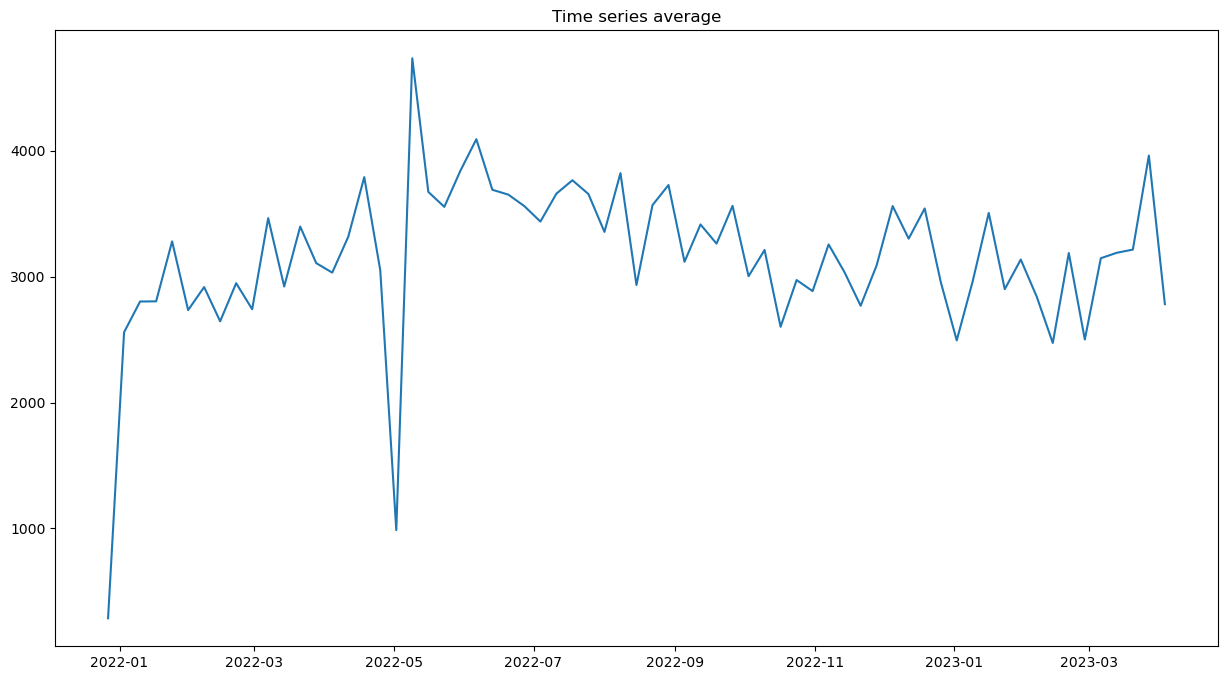

In [17]:
plt.figure(figsize =(15,8))
mean_group = df1.groupby(["Date"])["Quantity"].mean()
plt.plot(mean_group)
plt.title("Time series average")
plt.show()

Pada plot dibawah ini terlihat bahwa trend yang terlihat sangat fluktuatif.

Terlihat pula bahwa value median berada pada rentang 350 hingga 700 penjualan perminggunya.

Terlihat pada plot bahwa terdapat dip yang tajam pada bulan 5 tahun 2022 yang dimana merupakan penurunan penjualan yang sangat signifikan.

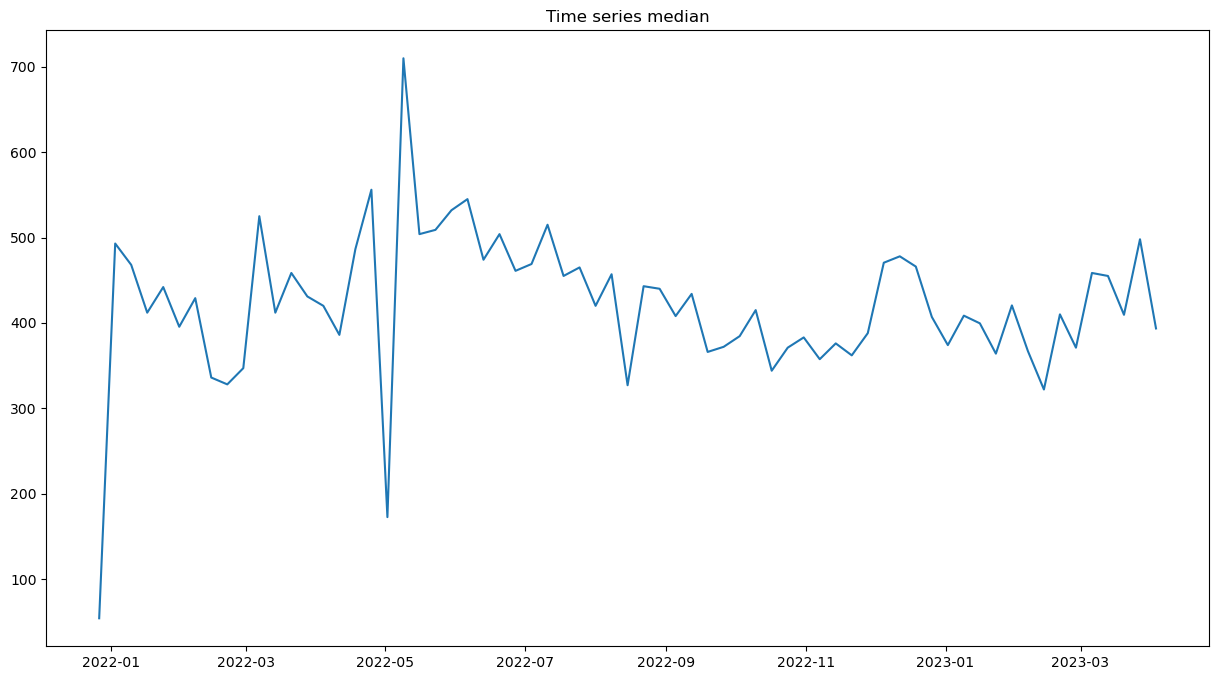

In [18]:
plt.figure(figsize =(15,8))
median_group = df1.groupby(["Date"])["Quantity"].median()
plt.plot(median_group)
plt.title("Time series median")
plt.show()

Pada plot dibawah ini terlihat bahwa trend yang terlihat sangat fluktuatif.

Terlihat pula bahwa standard deviasi pada data berada pada rentang 2500 hingga 21000.

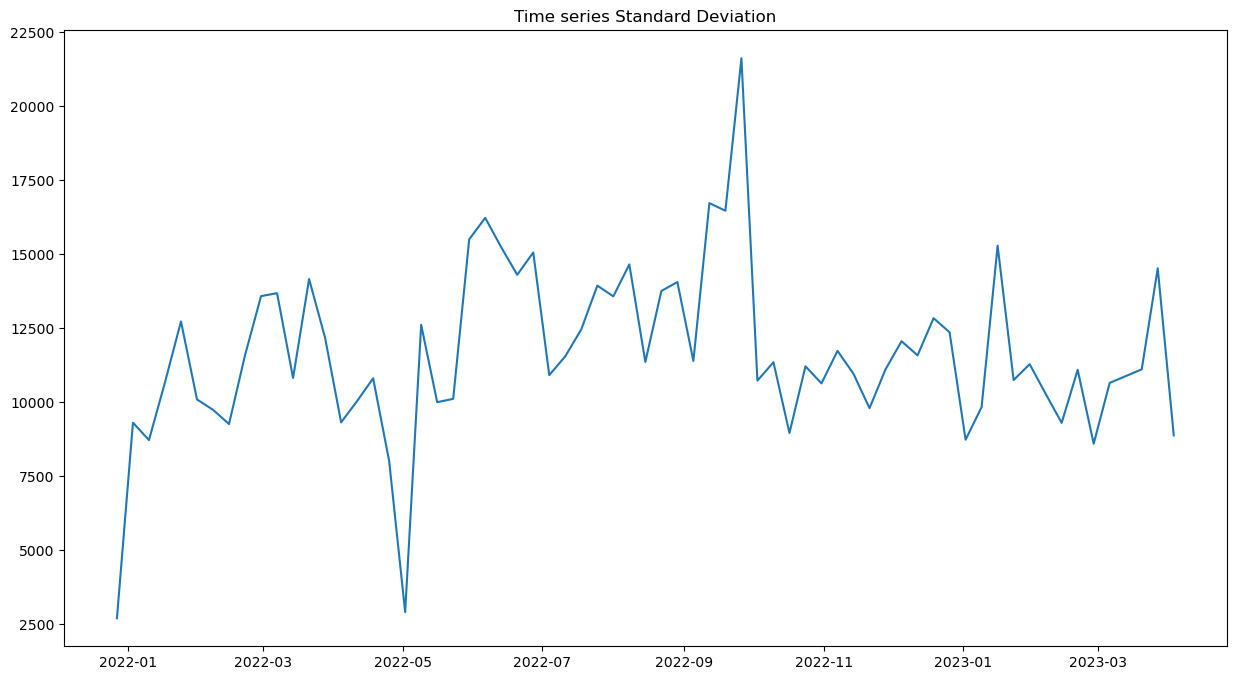

In [19]:
plt.figure(figsize =(15,8))
std_group = df1.groupby(["Date"])["Quantity"].std()
plt.plot(std_group)
plt.title("Time series Standard Deviation")
plt.show()

Pada plot dibawah ini terlihat bahwa trend yang terlihat sangat fluktuatif.

Terlihat pula bahwa total valie berada pada rentang 4000000 hingga 7000000 penjualan barang perminggunya.

Terlihat pada plot bahwa terdapat dip yang tajam pada bulan 5 tahun 2022 yang dimana merupakan penurunan penjualan yang sangat signifikan.

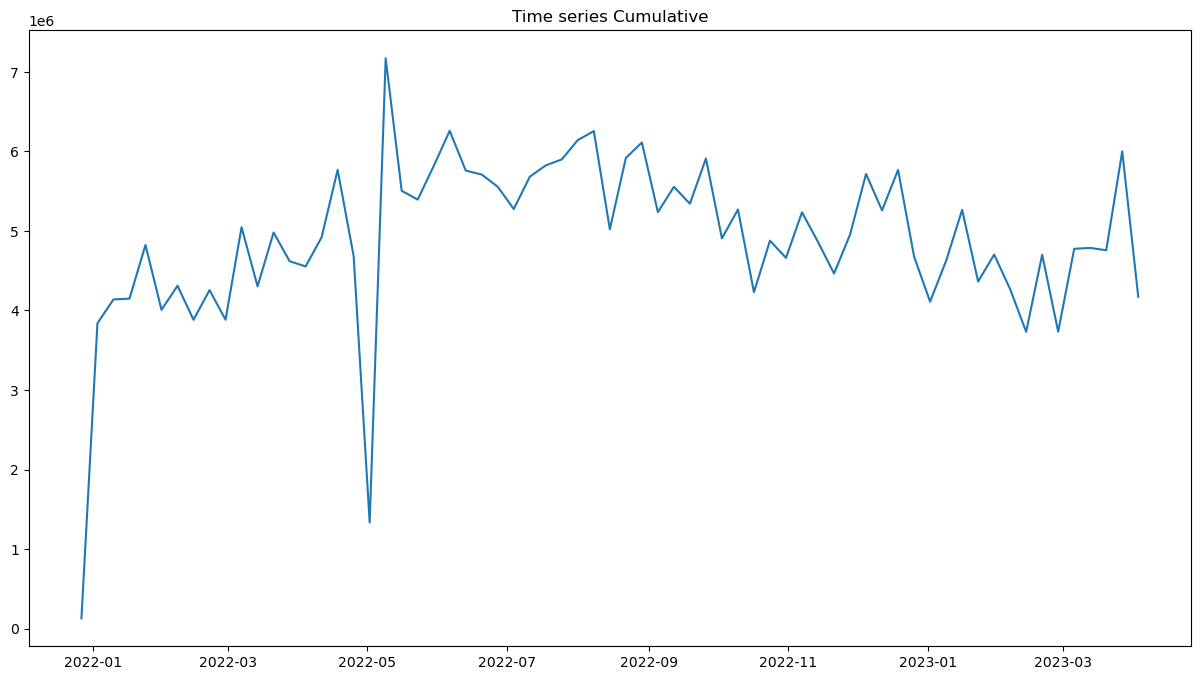

In [20]:
plt.figure(figsize =(15,8))
std_group = df1.groupby(["Date"])["Quantity"].sum()
plt.plot(std_group)
plt.title("Time series Cumulative")
plt.show()

# Model Training

Setelah memperoleh informasi pada proses EDA, langkah selanjutnya adalah mempersiapkan data train dan data test yang akan di pakai pada model training dan model evaluasi.

Karena dataset yang terbatas, maka data terbagi menjadi data train dan data test dengan train data dari 0 - 49 dan test dari 50 - 67.

In [21]:
train=data[0:50] 
test=data[50:]

In [22]:
test.head()

Date
2022-12-12    3301.443817
2022-12-19    3541.079804
2022-12-26    2958.884883
2023-01-02    2493.285021
2023-01-09    2964.080128
Name: Quantity, dtype: float64

Berikut merupakan plot pembagian data train dan data test

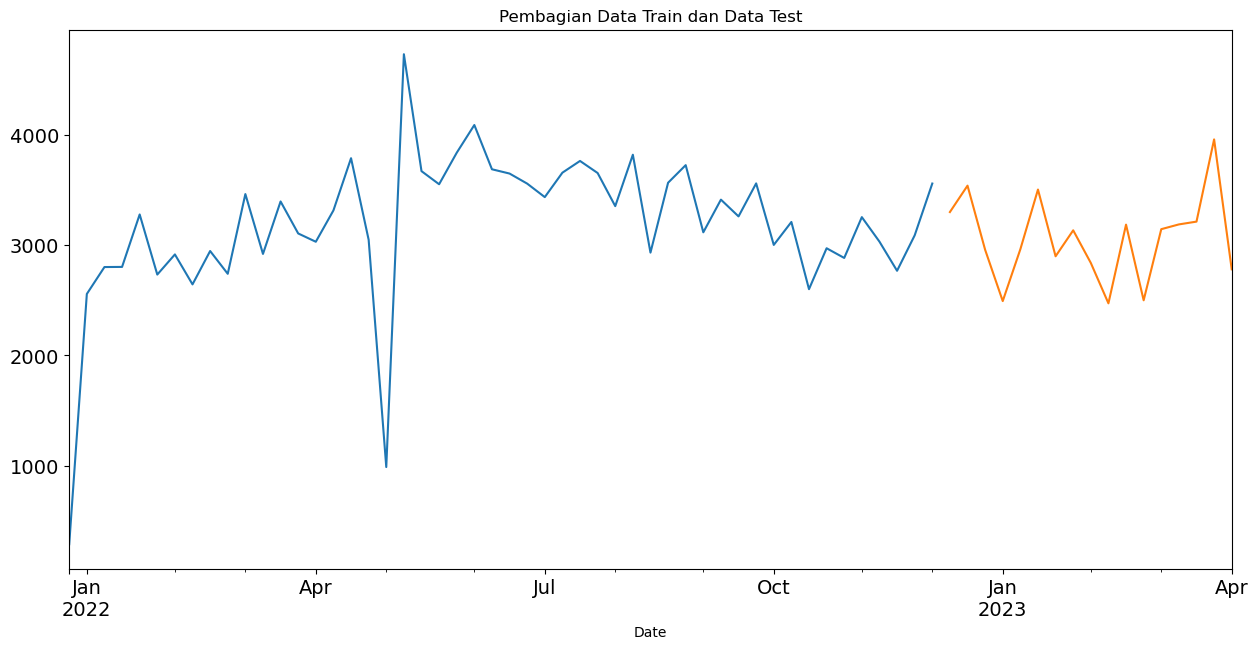

In [23]:
train.plot(figsize=(15,7), title= 'Pembagian Data Train dan Data Test', fontsize=14)
test.plot(figsize=(15,7), title= 'Pembagian Data Train dan Data Test', fontsize=14)

plt.show()

Selanjutnya adalah melakukan pengecekan stasionaritas setiap dataset dengan Augmented Dickey Fuller (adfuller) dari library statsmodel

In [24]:
def check_stationarity(series):
    result = adfuller(series.values)

    print('ADF Statistic: %f' % result[0])
    print('p-value: %f' % result[1])
    print('Critical Values:')
    for key, value in result[4].items():
        print('\t%s: %.3f' % (key, value))

    if (result[1] <= 0.05) & (result[4]['5%'] > result[0]):
        print("\u001b[32mStationary\u001b[0m")
    else:
        print("\x1b[31mNon-stationary\x1b[0m")

Terlihat bahwa dataset adalah data stationary karena nilai p-value 0.0000 dan lebih kecil dari level signifikansi 0.005.

In [25]:
check_stationarity(data)

ADF Statistic: -8.636153
p-value: 0.000000
Critical Values:
	1%: -3.534
	5%: -2.906
	10%: -2.591
Stationary


# Model Training

## ARIMA

ARIMA (Auto Regressive Integrated Moving Average) adalah gabungan dari 2 model, yaitu AR (Auto Regressive) dan MA (Moving Average). Model ini memiliki 3 parameter yang disebut hyperparameter, yaitu P (auto regressive lags), d (order of differentiation), dan Q (moving avg.) yang masing-masing berasal dari komponen AR, I, dan MA. Bagian AR mengacu pada korelasi antara periode waktu sebelumnya dan saat ini. Bagian MA digunakan untuk menyeimbangkan kebisingan dalam data, sedangkan bagian I mengikat bagian AR dan MA bersama-sama.

Untuk menentukan nilai P dan Q pada model ARIMA, kita dapat menggunakan plot ACF (Auto Correlation Function) dan PACF (Partial Auto Correlation Function). Pada kedua plot tersebut, kita perlu mencari nilai di sumbu-x yang membuat garis plot pertama kali mencapai nilai 0 pada sumbu-y.

Dari plot PACF (saat y=0), kita dapat menentukan nilai P.
Dari plot ACF (saat y=0), kita dapat menentukan nilai Q.

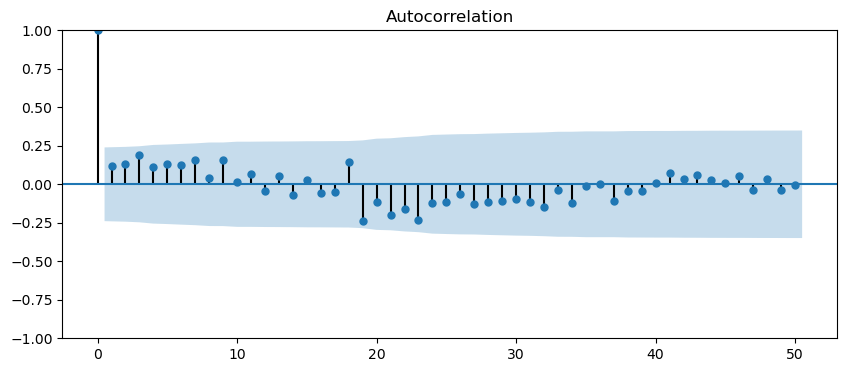

In [26]:
fig, ax = plt.subplots(figsize=(10, 4))
acf_plot = plot_acf(data, lags=50,ax=ax)

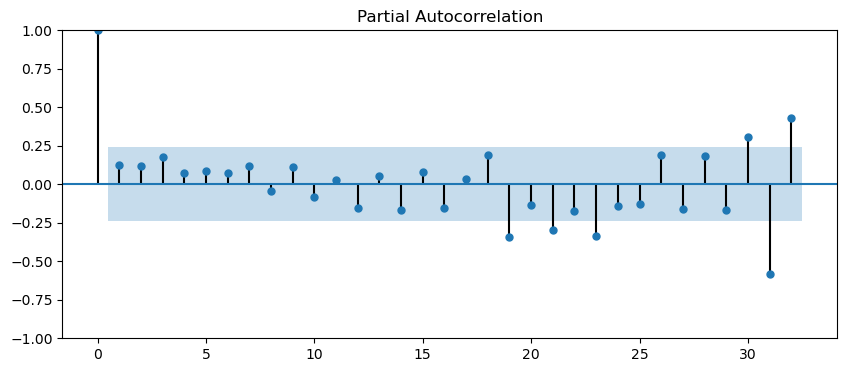

In [27]:
fig, ax = plt.subplots(figsize=(10, 4))
pacf_plot = plot_pacf(data,ax=ax, lags = 32)

terlihat bahwa 1 adalah nilai yang terbaik

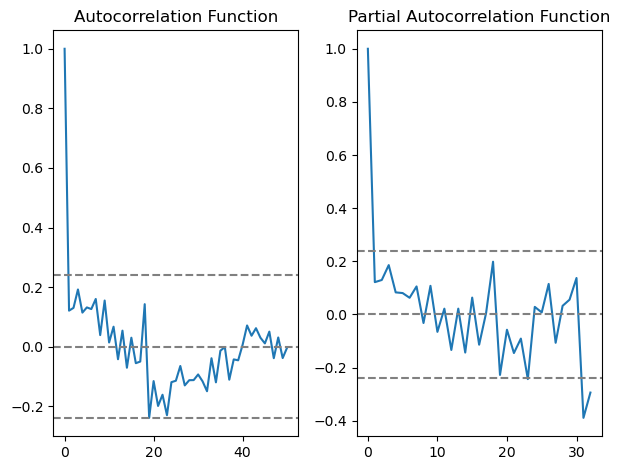

In [28]:
from statsmodels.tsa.stattools import acf, pacf
lag_acf = acf(data, nlags=50)
lag_pacf = pacf(data, nlags=32, method='ols')

#Plot ACF: 
plt.subplot(121) 
plt.plot(lag_acf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(data)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(data)),linestyle='--',color='gray')
plt.title('Autocorrelation Function')

#Plot PACF
plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0, linestyle='--', color='gray')
plt.axhline(y=-1.96/np.sqrt(len(data)), linestyle='--', color='gray')
plt.axhline(y=1.96/np.sqrt(len(data)), linestyle='--', color='gray')
plt.title('Partial Autocorrelation Function')
            
plt.tight_layout() 

dengan p dan q = 1 didapatkan nilai AIC 795

In [29]:
model = ARIMA(train, order=(18,0,3), freq = 'W-MON')
model_fit = model.fit()
print(model_fit.summary())

d:\Anaconda\envs\h8\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency W-MON will be used.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:               Quantity   No. Observations:                   50
Model:                ARIMA(18, 0, 3)   Log Likelihood                -387.214
Date:                Sun, 16 Apr 2023   AIC                            820.427
Time:                        11:20:59   BIC                            864.404
Sample:                    12-27-2021   HQIC                           837.174
                         - 12-05-2022                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       3184.5786    259.094     12.291      0.000    2676.764    3692.393
ar.L1         -0.8525      0.414     -2.061      0.039      -1.663      -0.042
ar.L2         -0.4278      0.620     -0.690      0.4

d:\Anaconda\envs\h8\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


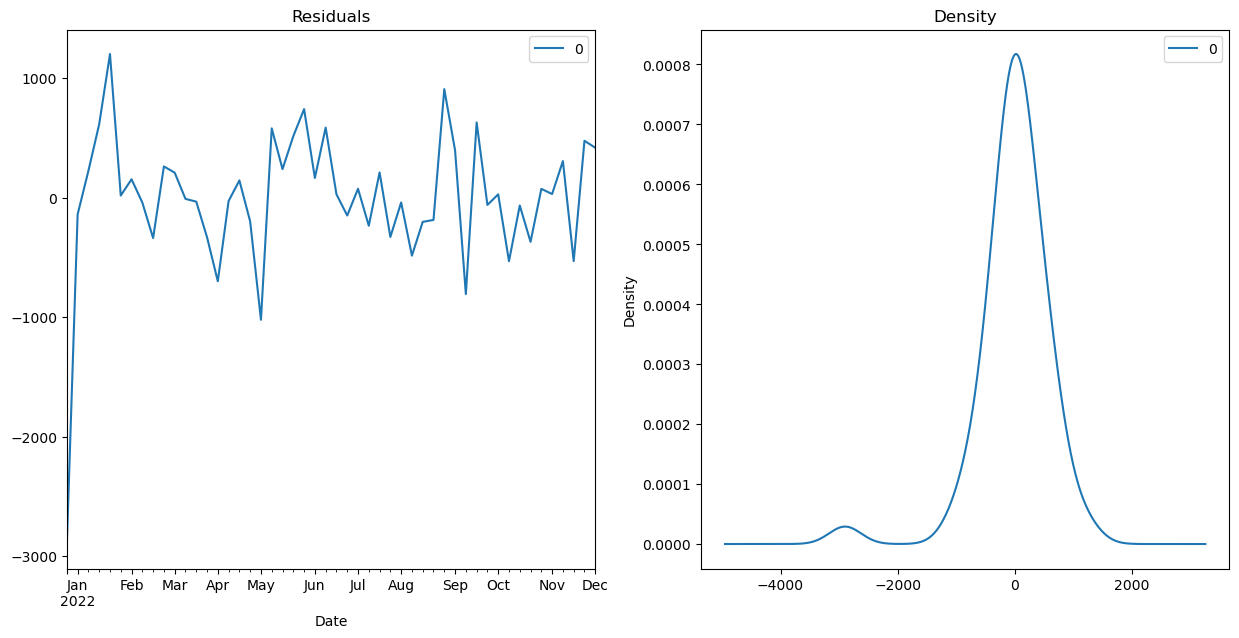

<Figure size 640x480 with 0 Axes>

In [30]:
# Plot residual errors
residuals = pd.DataFrame(model_fit.resid)
fig, ax = plt.subplots(1,2)
residuals.plot(title="Residuals", ax=ax[0], figsize=(15,7))
residuals.plot(kind='kde', title='Density', ax=ax[1])
plt.figure()
plt.show()

d:\Anaconda\envs\h8\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency W-MON will be used.
  self._init_dates(dates, freq)
d:\Anaconda\envs\h8\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Text(0, 0.5, 'Sales')

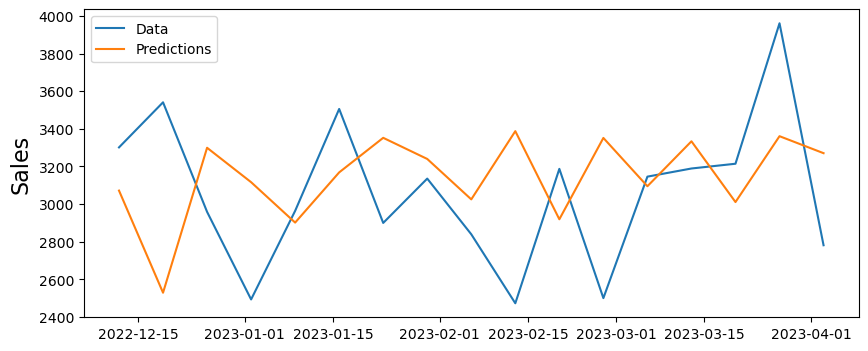

In [31]:
#Build Model
model1 = ARIMA(train, order=(18, 0, 3), freq = 'W-MON')
fitted = model1.fit()  
predictions = fitted.predict(start='2022-12-12', end='2023-04-03')

plt.figure(figsize=(10,4))

plt.plot(test)
plt.plot(predictions)

plt.legend(('Data', 'Predictions'), fontsize=10)

plt.ylabel('Sales', fontsize=16)

## Model Evaluation

Setelah membuat dan melakukan training model. Evaluasi akan dilakukan dengan membandingkan prediksi dengan data test sebenarnya.

Beberapa cara membandingkan adalah :

Visualisasi
Metric Evaluasi :
Mean Absolute Error ( MEA ) : Digunakan untuk mengukur besaran eror dari prediksi model terhadap nilai sebenarnya dari target
R2 Scrore : Digunakan untuk melihat bagaimana performa model dalam mengikuti pola dari data yang tersedia
Mean Absolute Percentage Error (MAPE) : Mengitung persentase besar eror nilai prediksi terhadap nilai aktual

In [32]:
# print judul
print('-'*15, ' TEST EVALUATION ARIMA', '-'*15)
# mae
print(f"Mean Absolute Error (MAE) : {mean_absolute_error(test,predictions):.2f}")
# mape
print(f"Mean Absolute Percentage Error (MAPE) : {mean_absolute_percentage_error(test,predictions):.2f}%")
# r2 score
print(f"R2 Score : {np.abs(r2_score(test,predictions)):.2f}")

---------------  TEST EVALUATION ARIMA ---------------
Mean Absolute Error (MAE) : 404.13
Mean Absolute Percentage Error (MAPE) : 0.14%
R2 Score : 0.69


Rata rata nilai eror dari prediksi (MAE) terhadap data test adalah 404.13. Nilai ini cukup kecil jika di bandingkan dengan range nilai sales yang berkisar ribuan. Untuk lebih spesifik dapat dilihat pada nilai MAPE. Persentase rata rata error adalah 0.14%. Persentase ini membuktikan bahwa nilai eror 404.13 sudah cukup kecil.

Sedangkan Nilai R2 Score menunjukkan bagaimana model mengikuti pola dari dataset yang dipelajari. Range nilai R2 Score adalah antara minus tak hingga sampai dengan 1 dan 1 merupakan saat model berhasil secara sempurna mengikuti pola. Nilai R2 Score pada data train 0.69 berarti model berhasil mengikuti pola data sebesar 69%

----

## Holt Winter

In [33]:
# set parameters
seasonal_periods = 11

# manually set initial seasonal values to 0
seasonal = np.zeros(seasonal_periods)

# create and fit model
model = ExponentialSmoothing(train, seasonal_periods=seasonal_periods, seasonal='add')
fit_holt_winter = model.fit(optimized = True)

# make predictions
forecast = fit_holt_winter.forecast(17)

print(forecast)

2022-12-12    3168.875495
2022-12-19    2465.250974
2022-12-26    3484.790434
2023-01-02    2940.543353
2023-01-09    3297.971155
2023-01-16    2505.041532
2023-01-23    3324.470672
2023-01-30    3218.427153
2023-02-06    3007.895424
2023-02-13    3265.790632
2023-02-20    3245.298706
2023-02-27    3168.875495
2023-03-06    2465.250974
2023-03-13    3484.790434
2023-03-20    2940.543353
2023-03-27    3297.971155
2023-04-03    2505.041532
Freq: W-MON, dtype: float64


d:\Anaconda\envs\h8\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency W-MON will be used.
  self._init_dates(dates, freq)


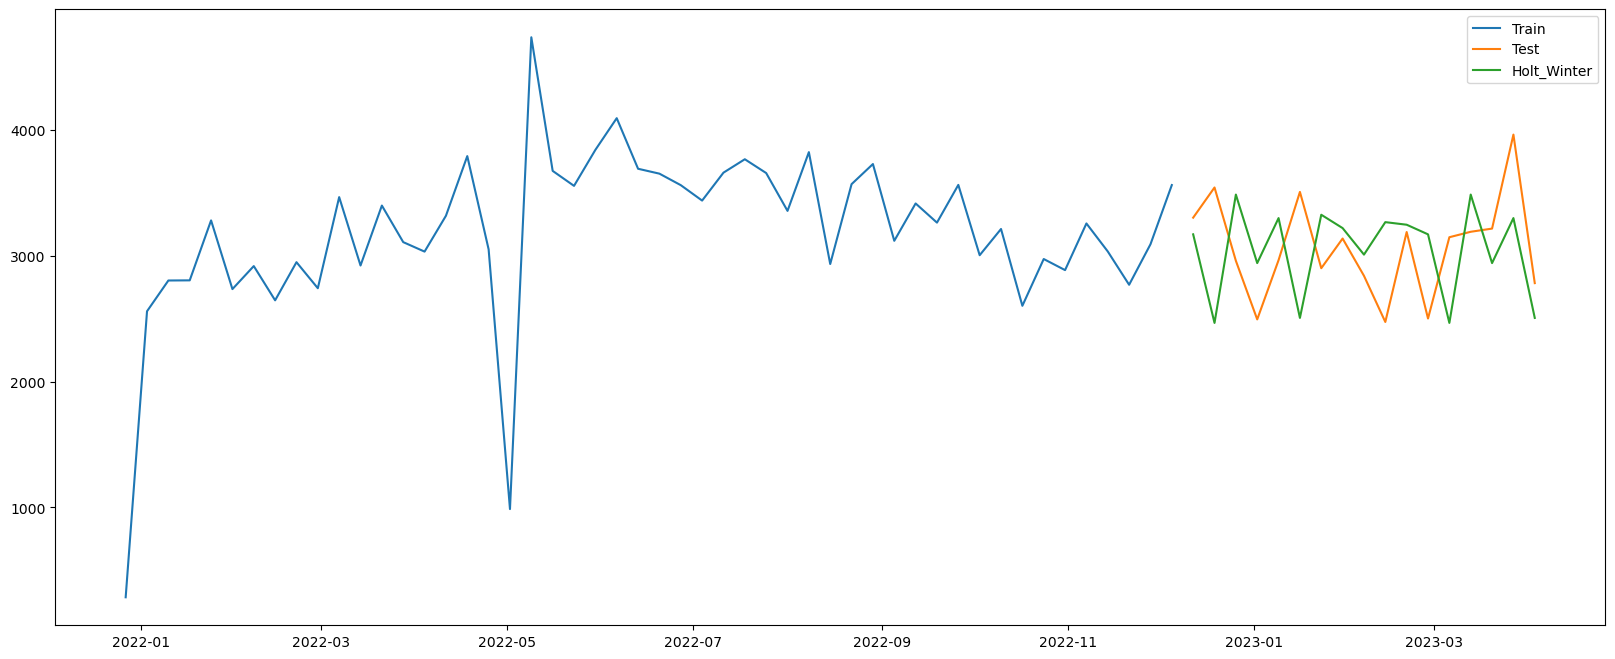

In [34]:
plt.figure(figsize=(20,8))
plt.plot(train, label='Train')
plt.plot(test, label='Test')
plt.plot(forecast, label='Holt_Winter')
plt.legend(loc='best')
plt.show()

## Model Evaluation

In [35]:
# print judul
print('-'*15, ' TEST EVALUATION HOLT WINTER', '-'*15)
# mae
print(f"Mean Absolute Error (MAE) : {mean_absolute_error(test,forecast):.2f}")
# mape
print(f"Mean Absolute Percentage Error (MAPE) : {mean_absolute_percentage_error(test,forecast):.2f}%")
# r2 score
print(f"R2 Score : {np.abs(r2_score(test,forecast)):.2f}")

---------------  TEST EVALUATION HOLT WINTER ---------------
Mean Absolute Error (MAE) : 464.77
Mean Absolute Percentage Error (MAPE) : 0.15%
R2 Score : 1.06


Rata rata nilai eror dari prediksi (MAE) terhadap data test adalah 464.77. Nilai ini cukup kecil jika di bandingkan dengan range nilai sales yang berkisar ribuan. Untuk lebih spesifik dapat dilihat pada nilai MAPE. Persentase rata rata error adalah 0.15%. Persentase ini membuktikan bahwa nilai eror 464.77 sudah cukup kecil.

Sedangkan Nilai R2 Score menunjukkan bagaimana model mengikuti pola dari dataset yang dipelajari. Range nilai R2 Score adalah antara minus tak hingga sampai dengan 1 dan 1 merupakan saat model berhasil secara sempurna mengikuti pola. Nilai R2 Score pada data train 1.06 berarti model berhasil mengikuti pola data sebesar 106%

## Auto ARIMA

Di Python, kita dapat menggunakan package pmdarima yang menyediakan fungsi auto_arima() untuk melakukan ARIMA Forecasting secara otomatis.

Fungsi auto_arima() menggunakan pendekatan bertahap (stepwise approach) untuk mencari berbagai kombinasi parameter p, d, dan q, dan memilih model terbaik yang memiliki nilai AIC terkecil.

In [36]:
model = pm.auto_arima(train, start_p=1, start_q=1,
                      test='adf',       # use adftest to find optimal 'd'
                      max_p=20, max_q=20, # maximum p and q
                      m=1,              # frequency of series
                      d=None,           # let model determine 'd'
                      seasonal=False,   # No Seasonality
                      start_P=0, 
                      D=0, 
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)

print(model.summary())

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=783.894, Time=0.12 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=797.823, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=789.031, Time=0.07 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=782.022, Time=0.08 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=796.166, Time=0.02 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=783.837, Time=0.12 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=785.001, Time=0.19 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=781.071, Time=0.04 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=782.945, Time=0.06 sec
 ARIMA(0,1,2)(0,0,0)[0]             : AIC=782.885, Time=0.06 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=787.656, Time=0.04 sec
 ARIMA(1,1,2)(0,0,0)[0]             : AIC=inf, Time=0.10 sec

Best model:  ARIMA(0,1,1)(0,0,0)[0]          
Total fit time: 0.916 seconds
                               SARIMAX Results                                
Dep. Variable:           

didapatkan hasil best model untuk arima adalah konfigurasi order 0, 1, 1 dengan nilai AIC adalah 781

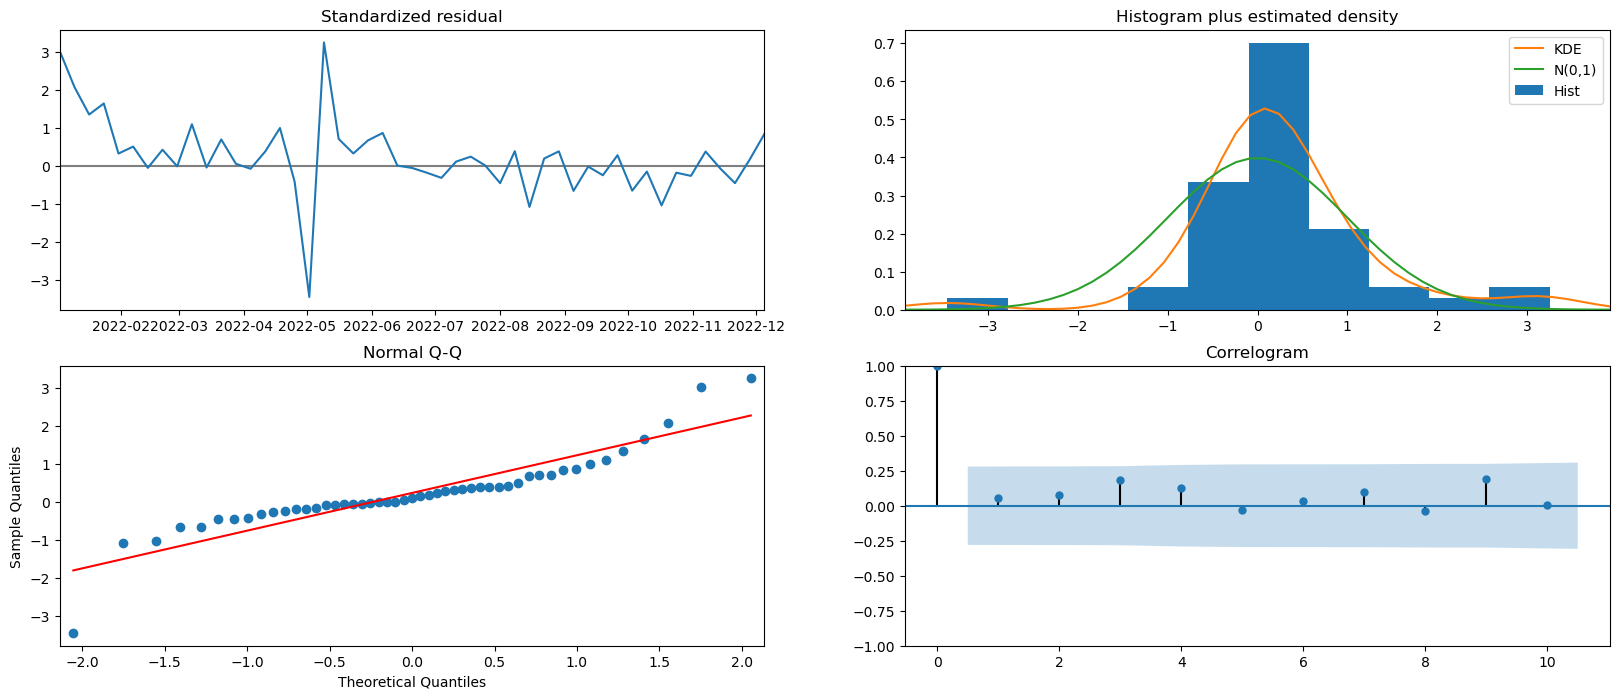

In [37]:
model.plot_diagnostics(figsize=(20,8))
plt.show()

Pengartian plot pada plot diagnostik
Standardized residual: Kesalahan sisa terlihat fluktuatif di sekitar rata-rata nol dan memiliki varian yang seragam.

Histogram: Plot kepadatan menunjukkan distribusi normal dengan rata-rata sedikit bergeser ke kanan.

Theoretical Quantiles: Sebagian besar titik jatuh tepat di atas garis merah. Deviasi yang signifikan akan menunjukkan distribusi yang miring.

Correlogram: Korelogram, atau plot ACF, menunjukkan kesalahan sisa tidak saling berkorelasi. Plot ACF akan menunjukkan adanya pola pada kesalahan sisa yang tidak dapat dijelaskan dalam model. Oleh karena itu, kita perlu mencari lebih banyak X (prediktor) untuk dimasukkan ke dalam model.

Secara keseluruhan, model ini good fit. Oleh karena itu, mari gunakan untuk memprediksi.

d:\Anaconda\envs\h8\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency W-MON will be used.
  self._init_dates(dates, freq)


Text(0, 0.5, 'Sales')

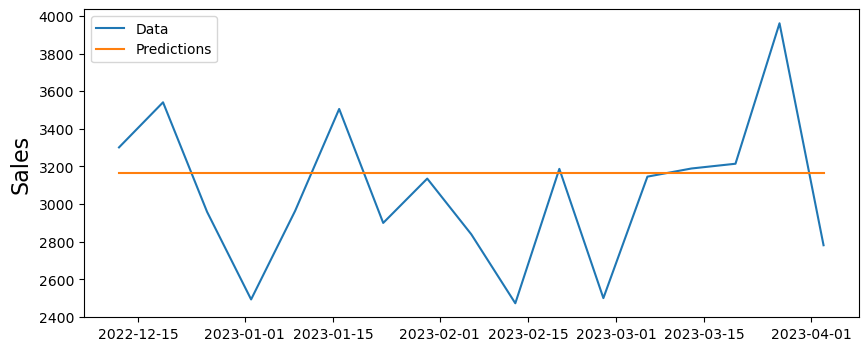

In [38]:
#Build Model
model2 = ARIMA(train, order=(0, 1, 1), freq = 'W-MON')
fitted = model2.fit()  
predictions1 = fitted.predict(start='2022-12-12', end='2023-04-03')

plt.figure(figsize=(10,4))

plt.plot(test)
plt.plot(predictions1)

plt.legend(('Data', 'Predictions'), fontsize=10)

plt.ylabel('Sales', fontsize=16)

In [39]:
# print judul
print('-'*15, ' TEST EVALUATION AUTO-ARIMA', '-'*15)
# mae
print(f"Mean Absolute Error (MAE) : {mean_absolute_error(test,predictions1):.2f}")
# mape
print(f"Mean Absolute Percentage Error (MAPE) : {mean_absolute_percentage_error(test,predictions1):.2f}%")
# r2 score
print(f"R2 Score : {np.abs(r2_score(test,predictions1)):.2f}")

---------------  TEST EVALUATION AUTO-ARIMA ---------------
Mean Absolute Error (MAE) : 306.43
Mean Absolute Percentage Error (MAPE) : 0.11%
R2 Score : 0.07


## Model Comparison

Setelah melakukan evaluasi pada kedua model, penulis membandingkan hasil metrik evaluasi kedua model

In [40]:
# mae
print('-'*5, " Mean Absolute Error (MAE) ", '-'*5)
print(f"Holt's Winter : {mean_absolute_error(test,forecast):.2f}")
print(f"Arima : {mean_absolute_error(test,predictions):.2f}")
print(f"Auto-Arima : {mean_absolute_error(test,predictions1):.2f}\n")

# mape
print('-'*5, " Mean Absolute Percentage Error (MAPE) ", '-'*5)
print(f"Holt's Winter : {mean_absolute_percentage_error(test,forecast)*100:.2f}")
print(f"Arima : {mean_absolute_percentage_error(test,predictions)*100:.2f}")
print(f"Auto-Arima : {mean_absolute_percentage_error(test,predictions1)*100:.2f}\n")

# r2 score
print('-'*5, " R2 Score ", '-'*5)
print(f"Holt's Winter : {np.abs(r2_score(test,forecast)):.2f}")
print(f"Arima : {np.abs(r2_score(test,predictions)):.2f}")
print(f"Auto-Arima : {np.abs(r2_score(test,predictions1)):.2f}")

-----  Mean Absolute Error (MAE)  -----
Holt's Winter : 464.77
Arima : 404.13
Auto-Arima : 306.43

-----  Mean Absolute Percentage Error (MAPE)  -----
Holt's Winter : 15.29
Arima : 13.76
Auto-Arima : 10.53

-----  R2 Score  -----
Holt's Winter : 1.06
Arima : 0.69
Auto-Arima : 0.07


Dari perbandingan diatas pada semua metode, diperoleh model Arima, holt winter, dan auto arima yang sama-sama memiliki keunggulan.

ARIMA unggul pada metrik MAE dan MAPE. Dengan demikian yang akan digunakan untuk forecasting 12 minggu setelah dataset adalah model ARIMA


----

# Model Saving

Setelah model penulis anggap maksimal maka selanjutnya adalah proses penyimpanan model sehingga dapat digunakan tanpa harus di lakukan train kembali.

In [41]:
# Model Saving

# produk a1
with open('model_ARIMA.pkl', 'wb') as file_1:
  joblib.dump(model_fit, file_1)

# Model Inference

Berikut adalah proses forecasting 12 minggu dari hari terakhir pada dataset

In [122]:
for i in range(52, 64):
    range_inf_ARIMA = len(test) + i
    inf_a1 = model_fit.predict(range_inf_ARIMA)
    print(f"Prediction with {i} additional periods: {inf_a1}")

Prediction with 52 additional periods: 2023-04-24    3078.907408
Freq: W-MON, dtype: float64
Prediction with 53 additional periods: 2023-05-01    3476.578631
Freq: W-MON, dtype: float64
Prediction with 54 additional periods: 2023-05-08    3148.936578
Freq: W-MON, dtype: float64
Prediction with 55 additional periods: 2023-05-15    3103.706902
Freq: W-MON, dtype: float64
Prediction with 56 additional periods: 2023-05-22    3262.220298
Freq: W-MON, dtype: float64
Prediction with 57 additional periods: 2023-05-29    3448.776936
Freq: W-MON, dtype: float64
Prediction with 58 additional periods: 2023-06-05    3070.088943
Freq: W-MON, dtype: float64
Prediction with 59 additional periods: 2023-06-12    3210.170867
Freq: W-MON, dtype: float64
Prediction with 60 additional periods: 2023-06-19    3369.362779
Freq: W-MON, dtype: float64
Prediction with 61 additional periods: 2023-06-26    3058.874709
Freq: W-MON, dtype: float64
Prediction with 62 additional periods: 2023-07-03    3280.859576
Freq:

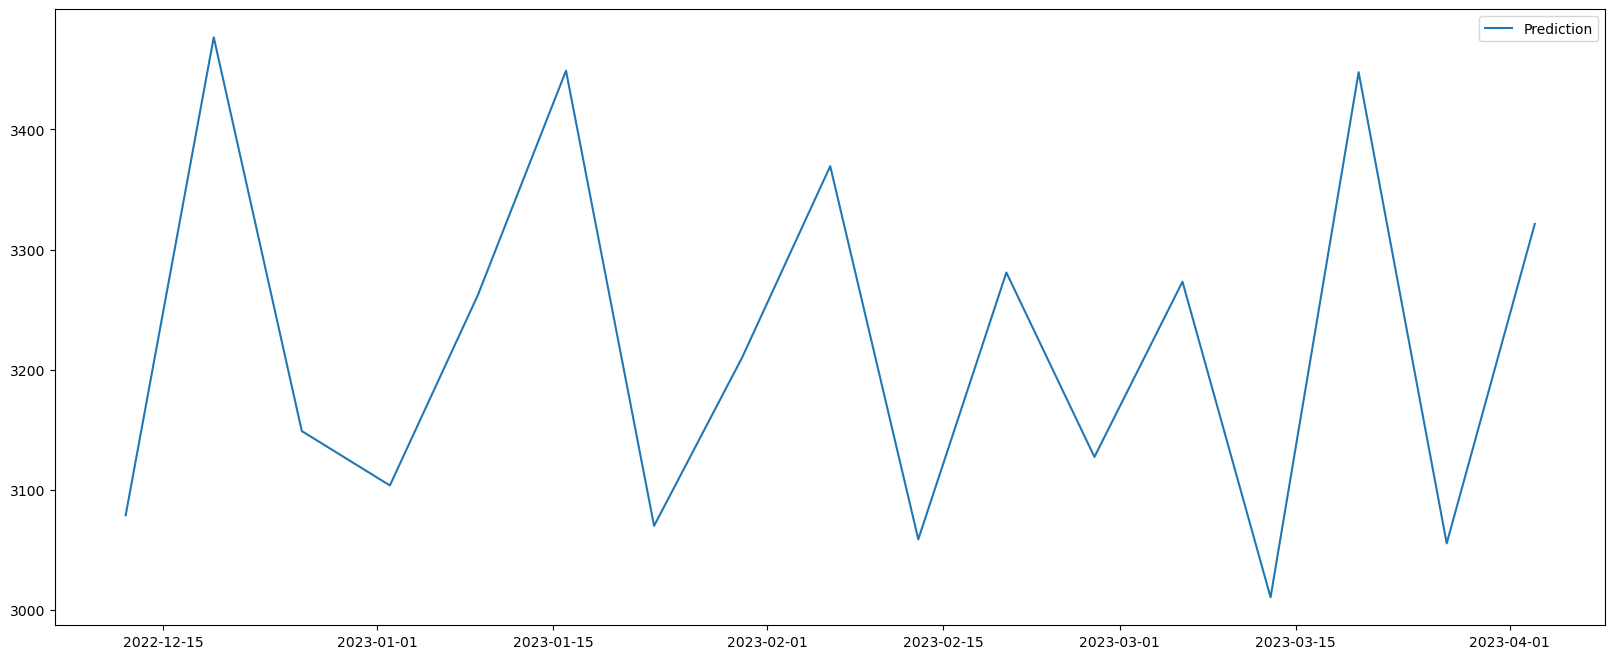

In [136]:
predictions = []

for i in range(52, 100):
    range_inf_ARIMA = len(test) + i
    inf_a1 = model_fit.predict(range_inf_ARIMA)
    predictions.append(inf_a1)

# Get the dates from the test dataframe
dates = test.index

# Combine the dates with the predictions using zip
pred_with_dates = list(zip(dates, predictions))

# Create a new dataframe to hold the predictions with dates
pred_df = pd.DataFrame(pred_with_dates, columns=['date', 'prediction'])

# Set the date column as the index
pred_df.set_index('date', inplace=True)

# Plot the predictions with dates
plt.figure(figsize=(20,8))
plt.plot(pred_df, label='Prediction')
plt.legend()
plt.show()

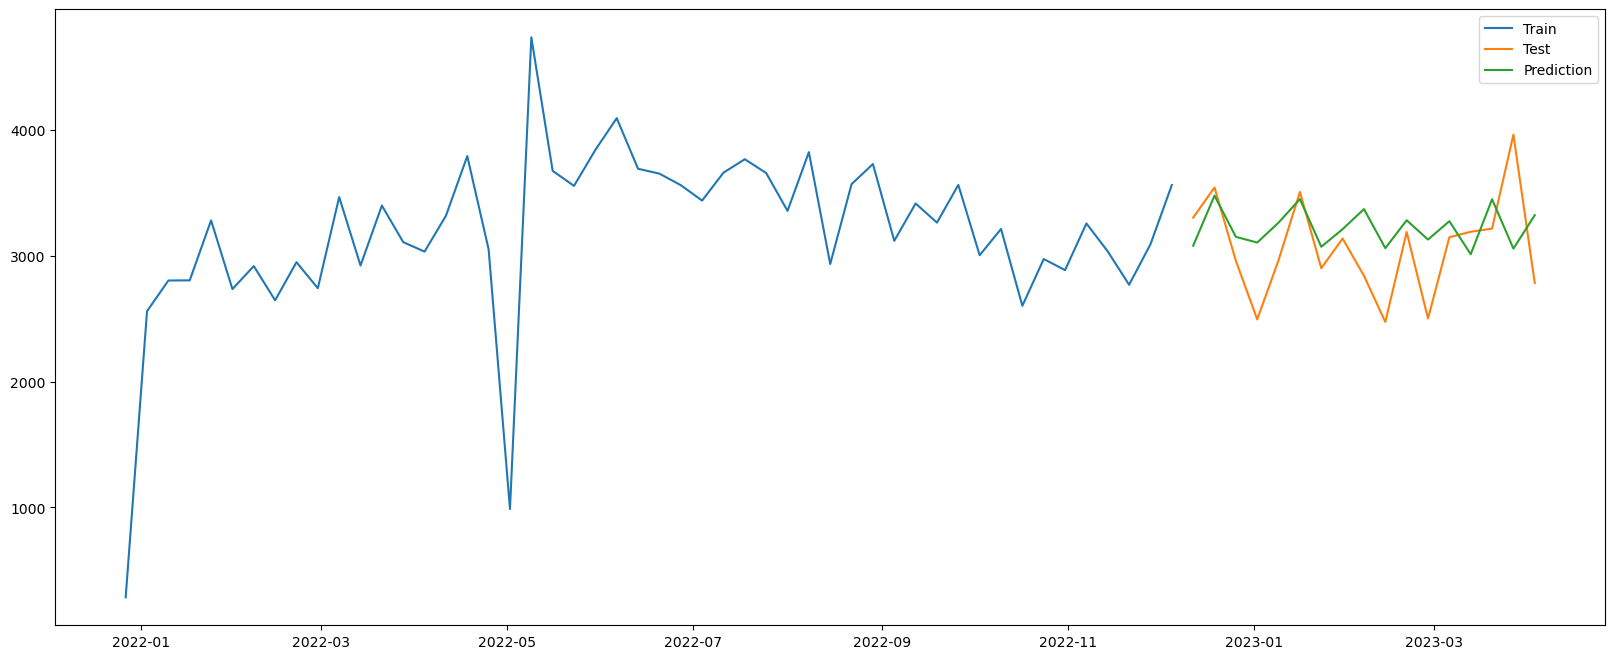

In [137]:
plt.figure(figsize=(20,8))
plt.plot(train, label='Train')
plt.plot(test, label='Test')
plt.plot(pred_df, label='Prediction')
plt.legend()
plt.show()

# Conclusion / Overall Analysis

## Model Analysis

### ARIMA

- Performa model cukup baik 

- Akurasi cukup baik dengan rata - rata persentase kesalahan kecil pada dataset

- Model cukup mampu mengikuti pola data dengan baik

### Exponential Smoothing Holt's Winter

- MAPE dan MAE terbesar sehingga memiliki rata-rata error yang tertinggi diantara 3 model.

- Memiliki Value R2 terbesar yang berarti sangat dapat mengikuti test model

### AUTO ARIMA

- Memiliki nilai MAPE dan MAE terkecil yang berarti memiliki rata-rata error yang terendah diantara 3 model.

- Namun memiliki Value R2 terkecil yang dimana model tidak dapat mengikuti test model.

### Final Model

Dari hasil evaluasi maka model yang terbaik dan digunakan dalam forcasting 12 Minggu mendatang adalah model ARIMA

### Further Improvement

- Mencoba lebih banyak kombinasi parameters pada model holt's winter dan arima.

- Mempersipakan lebih banyak data untuk training.

- Menggunakan metode transfer learning

### Overall Analysis

- Import semua library yang di butuhkan

- Load dataset dan eksplorasi basic info dari data

- Exploarsi Data Analytics untuk menemukan insight.

- Mengubah kolom day yang masih integer menjadi bentuk tanggal

- Melakukan pengecekan pada isi setiap kolom

- Cek missing value

- Melakukan deskriptif analisis

- Cek apakah dataset statsioner atau tidak

- Split dataset menjadi data train dan dataset

- Model Defenition and Training

- Evaluasi model dengan menggunakan visualisasi, metrik evaluasi, dan perbandingan side to side.

- Model Comparison

- Menggunakan model Auto Arima

- Model definition, training and evaluasi

- Perbandingan dan pemilihan antara model Holt's Winter, Arima, dan Auto Arima

- Model Saving

- Forecasting 12 minggu mendatang dengan best model yaitu arima

- Pengambilan kesimpulan

- Analisis model

- Futher Improvement